In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from pyforest import*
lazy_imports()

['from sklearn import metrics',
 'from sklearn.model_selection import KFold',
 'import fbprophet',
 'import skimage',
 'from sklearn.preprocessing import OneHotEncoder',
 'import xgboost as xgb',
 'import altair as alt',
 'from sklearn.linear_model import ElasticNetCV',
 'import glob',
 'import plotly.graph_objs as go',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import os',
 'from sklearn.impute import SimpleImputer',
 'import spacy',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.cluster import KMeans',
 'from sklearn.linear_model import Lasso',
 'import datetime as dt',
 'import sys',
 'import nltk',
 'import statsmodels.api as sm',
 'import re',
 'from sklearn.manifold import TSNE',
 'import pydot',
 'import statistics',
 'import sklearn',
 'import pickle',
 'import awswrangler as wr',
 'import cv2',
 'import seaborn as sns',
 'from scipy import signal as sg',
 'import bokeh',
 'import tor

In [5]:
df=pd.read_csv('concrete_data.csv')

<IPython.core.display.Javascript object>

In [6]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [6]:
df.shape

(1030, 9)

In [9]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [10]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Exploratory Analysis**

In [4]:
def quartile(col, data=df):
    """
    Function to identify the 25% , 75% quartiles and Interquatile range for each column on the dataset
    col = column in the dataset
    df = dataset
    """
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
#     return('1st Quartile: ', Q1)
#     return('3rd Quartile: ', Q3)
    print('1st Quartile: ', Q1,'\n',
           '3rd Quartile: ', Q3,'\n',
          'Interquartile range (IQR): ', stats.iqr(df[col]))

    
    
    
def outlier_checker(col, data=df):
    """
    Function to detect the presence of outliers in each column in the dataset
    col = column in the dataset
    df = dataset
    L_outlier = lower boundary
    U_outlier = upper boundary
    """
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    
    #Outlier detection from Interquatile range 
    L_outlier = Q1-1.5*(Q3-Q1)
    U_outlier = Q3+1.5*(Q3-Q1)

    print('Lower outlier limit: ', L_outlier)
    print('Upper Outlier limit: ', U_outlier)

    # Checking for outliers
    print('Number of outliers in upper bound: ',df[df[col]>U_outlier][col].count())
    print('Number of outliers in Lower bound: ',df[df[col]<-L_outlier][col].count())
    print('% of outliers in upper bound: ',round(df[df[col]>U_outlier][col].count()*100/len(df),2) )
    print('% of outliers in Lower bound: ',round(df[df[col]<-L_outlier][col].count()*100/len(df),2) )

    #Distribution of Cement
#     plt.figure(figsize=(8,8))
    return(sns.boxplot(x=col, data=df, orient='h'))
    
#     print(sns.distplot(df[col]).set_title(col))
    

##### Cement

Lower outlier limit:  -44.0625
Upper Outlier limit:  586.4375
Number of outliers in upper bound:  0
Number of outliers in Lower bound:  0
% of outliers in upper bound:  0.0
% of outliers in Lower bound:  0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'cement')

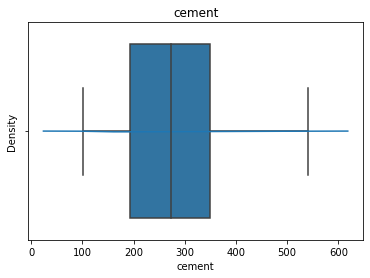

In [92]:
outlier_checker('cement')


##### Water

Lower outlier limit:  124.25000000000001
Upper Outlier limit:  232.64999999999998
Number of outliers in upper bound:  4
Number of outliers in Lower bound:  0
% of outliers in upper bound:  0.39
% of outliers in Lower bound:  0.0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='water'>

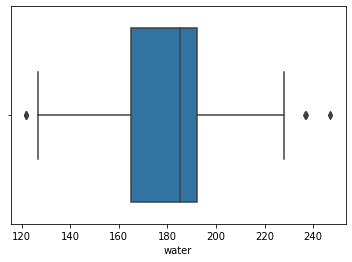

In [94]:
outlier_checker('water')


##### blast_furnace_slag

Lower outlier limit:  -214.42499999999998
Upper Outlier limit:  357.375
Number of outliers in upper bound:  2
Number of outliers in Lower bound:  973
% of outliers in upper bound:  0.19
% of outliers in Lower bound:  94.47


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='blast_furnace_slag'>

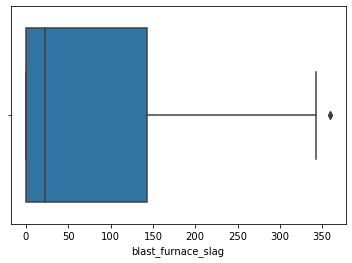

In [97]:
outlier_checker('blast_furnace_slag')

##### fly_ash

Lower outlier limit:  -177.45
Upper Outlier limit:  295.75
Number of outliers in upper bound:  0
Number of outliers in Lower bound:  1011
% of outliers in upper bound:  0.0
% of outliers in Lower bound:  98.16


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='fly_ash'>

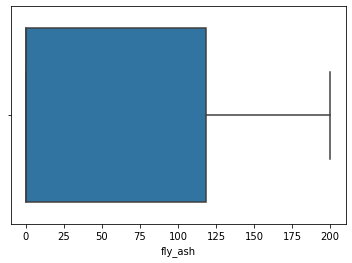

In [98]:
outlier_checker('fly_ash')

##### superplasticizer

Lower outlier limit:  -15.299999999999999
Upper Outlier limit:  25.5
Number of outliers in upper bound:  10
Number of outliers in Lower bound:  969
% of outliers in upper bound:  0.97
% of outliers in Lower bound:  94.08


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='superplasticizer'>

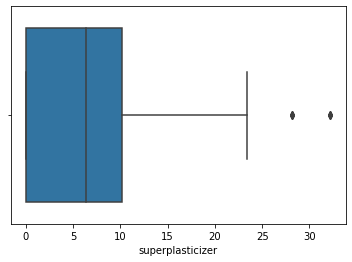

In [99]:
outlier_checker('superplasticizer')

##### coarse_aggregate

Lower outlier limit:  785.8999999999999
Upper Outlier limit:  1175.5000000000002
Number of outliers in upper bound:  0
Number of outliers in Lower bound:  0
% of outliers in upper bound:  0.0
% of outliers in Lower bound:  0.0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='coarse_aggregate'>

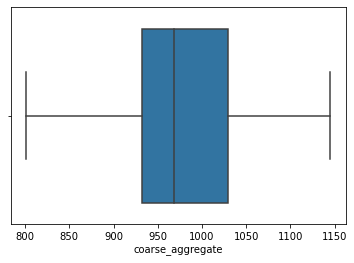

In [100]:
outlier_checker('coarse_aggregate')

##### fine_aggregate

Lower outlier limit:  591.3749999999998
Upper Outlier limit:  963.575
Number of outliers in upper bound:  5
Number of outliers in Lower bound:  0
% of outliers in upper bound:  0.49
% of outliers in Lower bound:  0.0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='fine_aggregate '>

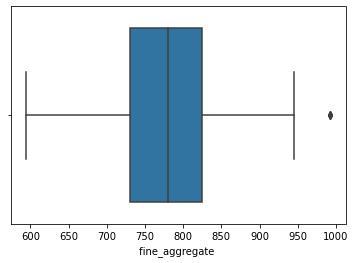

In [101]:
outlier_checker('fine_aggregate ')

##### age

Lower outlier limit:  -66.5
Upper Outlier limit:  129.5
Number of outliers in upper bound:  59
Number of outliers in Lower bound:  840
% of outliers in upper bound:  5.73
% of outliers in Lower bound:  81.55


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age'>

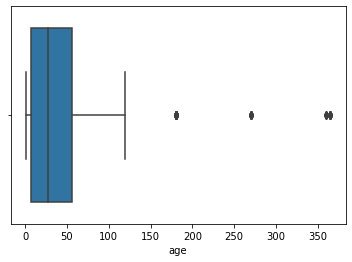

In [102]:
outlier_checker('age')

##### concrete_compressive_strength

Lower outlier limit:  -9.927500000000013
Upper Outlier limit:  79.77250000000001
Number of outliers in upper bound:  4
Number of outliers in Lower bound:  39
% of outliers in upper bound:  0.39
% of outliers in Lower bound:  3.79


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='concrete_compressive_strength'>

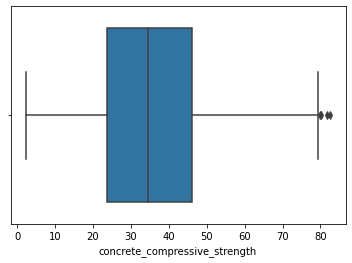

In [103]:
outlier_checker('concrete_compressive_strength')

**Multivariate Analysis**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'cement')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'blast_furnace_slag')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'fly_ash')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'water')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'superplasticizer')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'coarse_aggregate')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'fine_aggregate ')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'age')


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'concrete_compressive_strength')


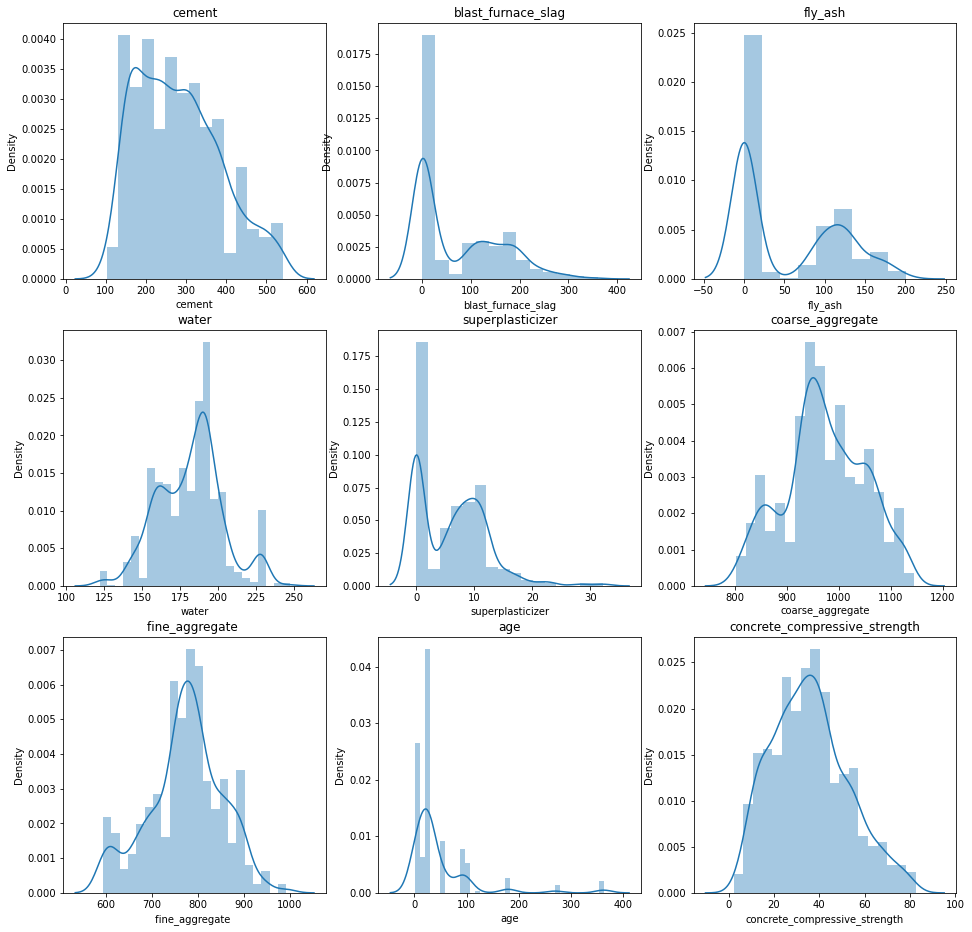

In [140]:
fig, ax2 = plt.subplots(3,3, figsize=(16,16))
i = [0,0,0,1,1,1,2,2,2]
j = [0,1,2,0,1,2,0,1,2]
for (a,b,c) in zip(i,j,df.columns):
    print(sns.distplot(df[c], ax=ax2[a][b]).set_title(c));

**Observations**

* Cement is normal
*  Slag has 3 guassians and rightly skewed
*Ash has 3 guassians and rightly skewed
* Water has 3 guassians and rightly skewed
* Superplastic has 2 guassians and rightly skewed
* Coarseagg has 3 guassian and rightly skewed
* fineagg has almost 2 guassians and looks normal
* age has multiple guassians and rightly skewed

<IPython.core.display.Javascript object>

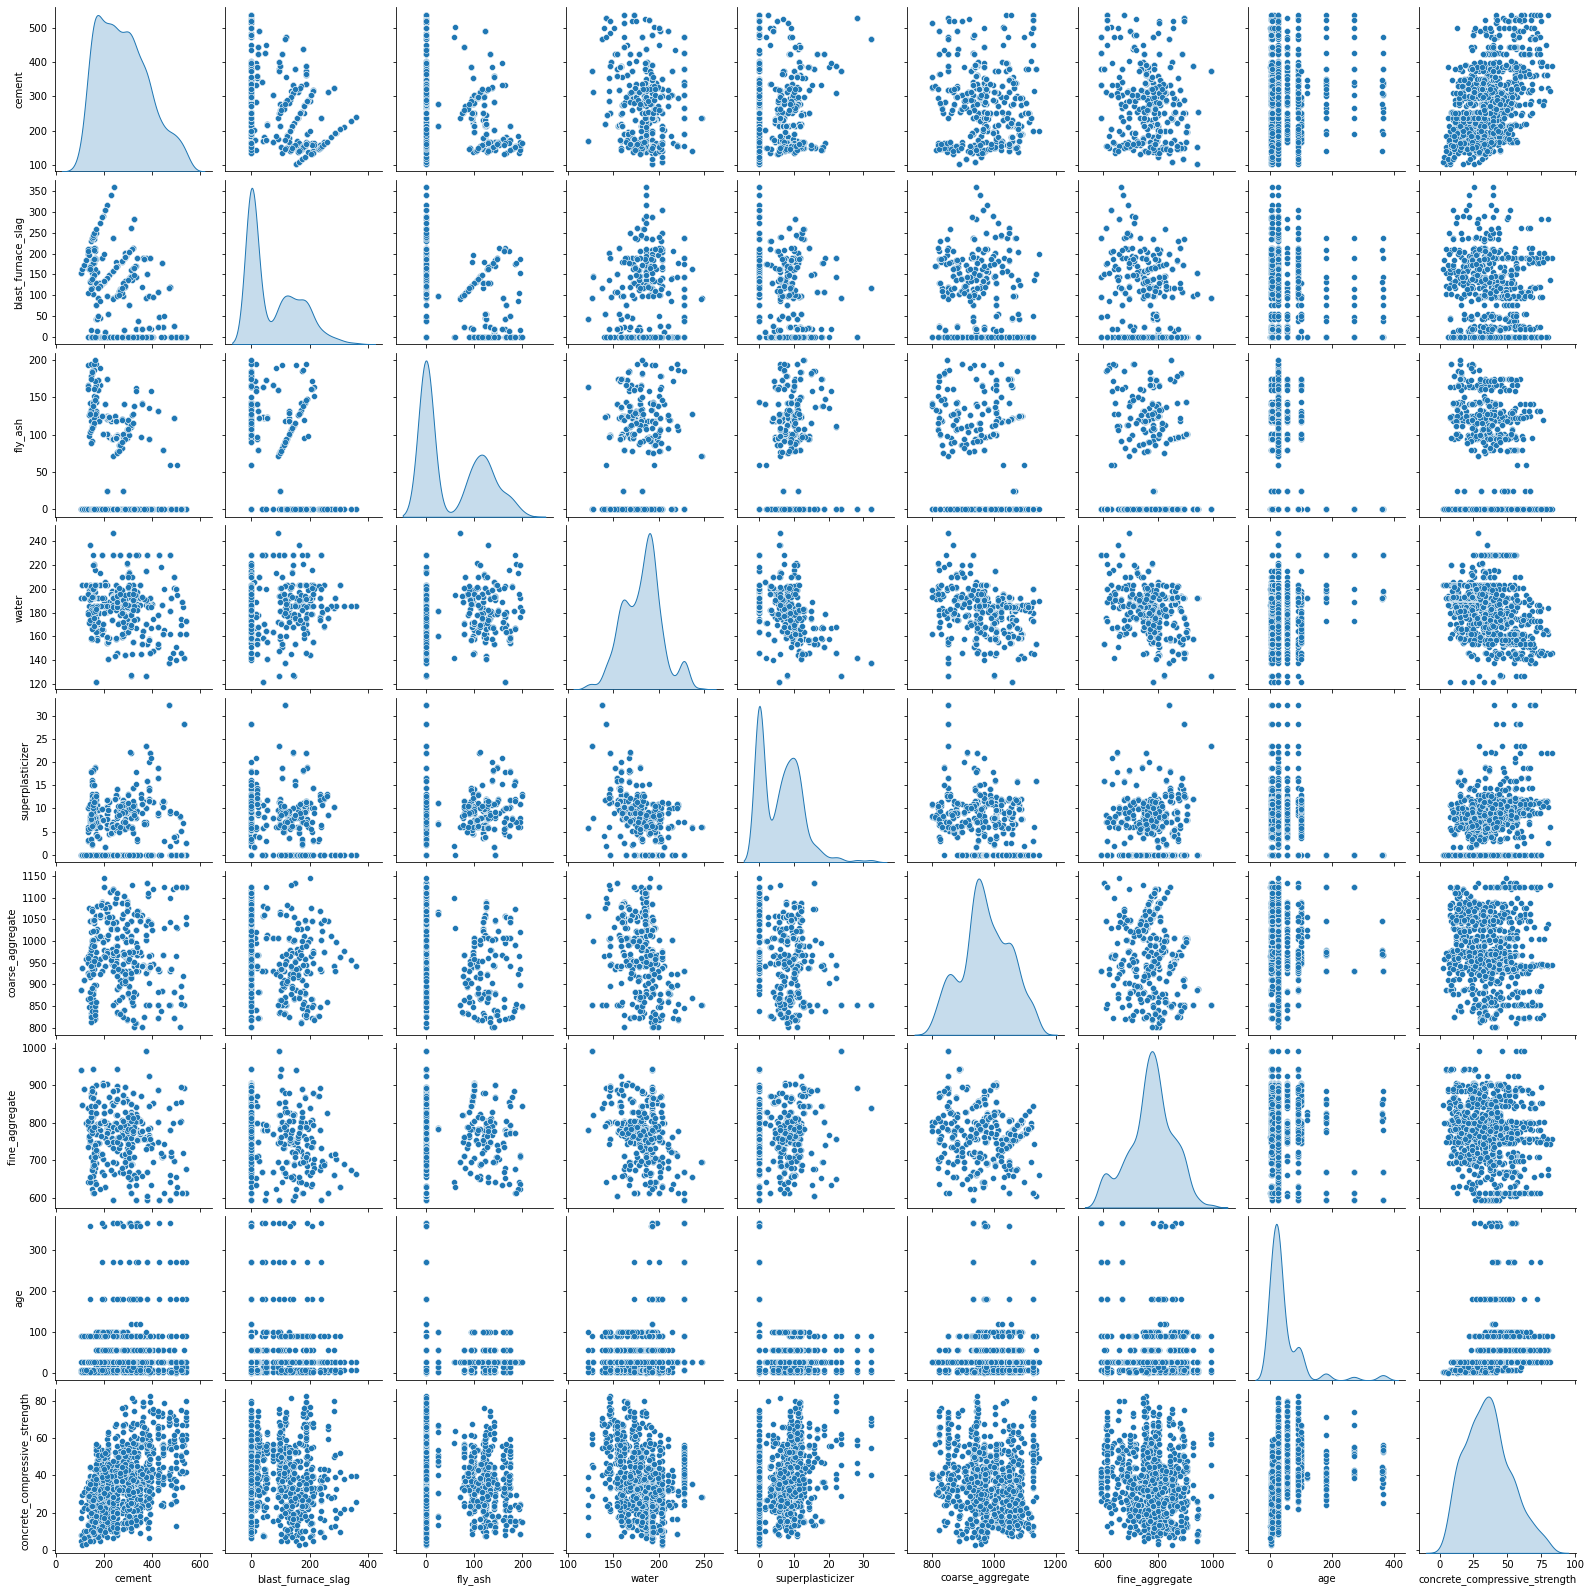

In [141]:
# Alternative to the histograms we can use a paiplot
sns.pairplot(df, diag_kind='kde')

#### Correlation between Variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

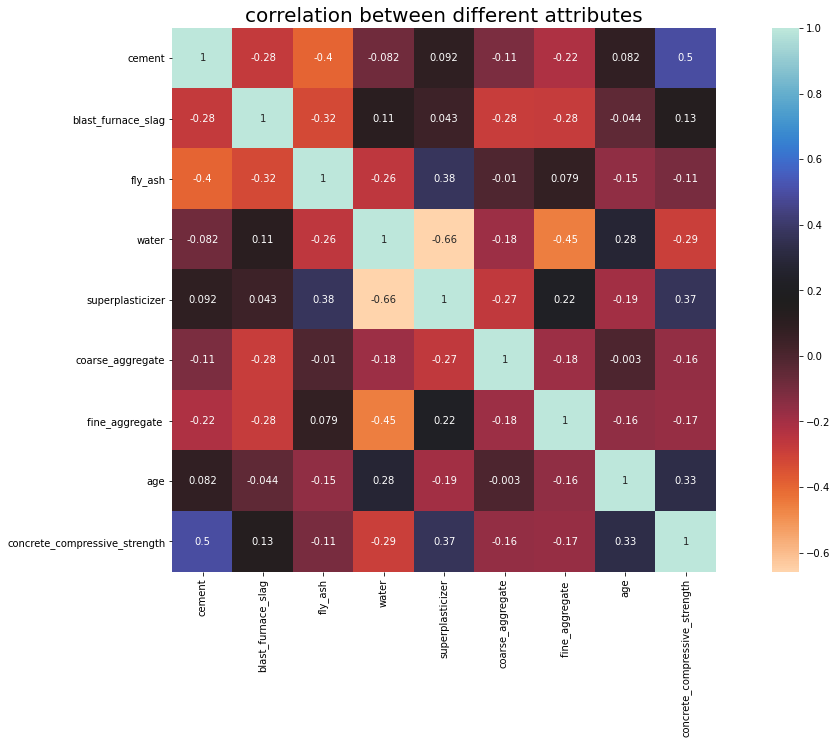

In [162]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmax=1, square=True, annot= True, cmap='icefire_r')
plt.title('correlation between different attributes',size=20)
plt.show()

<AxesSubplot:>

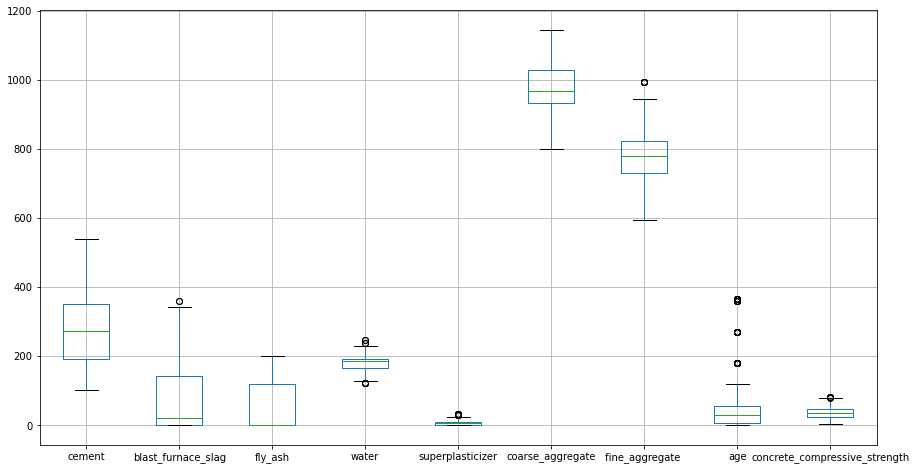

In [163]:
df.boxplot(figsize=(15,8))

### Ckecking for Outliers

In [166]:
# Checking outliers using the Normal Distribution Formular
for col in df.columns:
    print('Outliers in ',col,': ',df[((df[col]-df[col].mean())/df[col].std()).abs()>3][col].count())

Outliers in  cement :  0
Outliers in  blast_furnace_slag :  4
Outliers in  fly_ash :  0
Outliers in  water :  2
Outliers in  superplasticizer :  10
Outliers in  coarse_aggregate :  0
Outliers in  fine_aggregate  :  0
Outliers in  age :  33
Outliers in  concrete_compressive_strength :  0


### Replacing the Outliers by the median

In [168]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    iqr = Q3-Q1
    
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df.loc[(df[col]<low)|(df[col]>high), col]=df[col].median()

Outliers in  cement :  0
Outliers in  blast_furnace_slag :  2
Outliers in  fly_ash :  0
Outliers in  water :  0
Outliers in  superplasticizer :  5
Outliers in  coarse_aggregate :  0
Outliers in  fine_aggregate  :  0
Outliers in  age :  3
Outliers in  concrete_compressive_strength :  0


<AxesSubplot:>

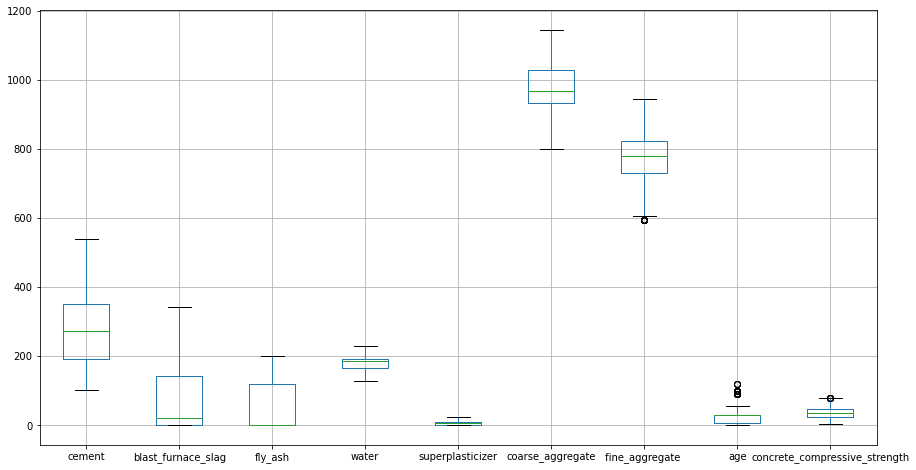

In [169]:
# Checking outliers using the Normal Distribution Formular
for col in df.columns:
    print('Outliers in ',col,': ',df[((df[col]-df[col].mean())/df[col].std()).abs()>3][col].count())
    
df.boxplot(figsize=(15,8))